# Gestión riesgos de las carteras


La gestión del **riesgo de cartera** es el proceso de identificar, evaluar y mitigar los diversos riesgos asociados con una cartera de inversiones.

Implica implementar estrategias para optimizar el equilibrio entre riesgo y retorno, asegurando que la cartera se alinee con los **objetivos financieros y la tolerancia al riesgo del inversor**. 

Una gestión de riesgos efectiva ayuda a minimizar las pérdidas potenciales, optimizar los retornos y mejorar el rendimiento de la inversión a largo plazo.

La gestión del riesgo de cartera es esencial para optimizar el rendimiento y proteger las inversiones.

Implica la identificación y evaluación de riesgos, la implementación de estrategias de mitigación y la monitoriazción continua.

Herramientas como el valor en riesgo, la desviación estándar y la beta son fundamentales en este proceso.

Estrategias como la diversificación y el reequilibrio ayudan a minimizar el impacto de los riesgos.

Una gestión efectiva del riesgo permite ajustes informados, contribuyendo a la estabilidad y crecimiento de la cartera a largo plazo.

### Componentes clave de la gestión del riesgo de cartera:

1. **Identificación de Riesgos:** Implica reconocer los diversos riesgos asociados con una cartera de inversiones, incluidos los relacionados con activos específicos, sectores o estrategias de inversión.

2. **Evaluación y Medición de Riesgos:** Involucra cuantificar el impacto potencial de los riesgos identificados en el desempeño de la cartera de inversiones. Este paso utiliza diversas herramientas y métricas, como el valor en riesgo (VaR), la desviación estándar y la beta.

3. **Estrategias de Mitigación de Riesgos:** Implica implementar tácticas para reducir el impacto potencial de los riesgos identificados en la cartera. Estas estrategias pueden incluir diversificación, ajustes en la asignación de activos, cobertura y reequilibrio.

4. **Monitoreo y Revisión de Riesgos:** Involucra la evaluación continua y la valoración del perfil de riesgo de la cartera y la efectividad de las estrategias de gestión de riesgos implementadas. Las revisiones regulares de la cartera ayudan a los inversores a tomar decisiones informadas y ajustar sus estrategias según sea necesario.


### Estrategias clave para la gestión del riesgo en carteras:

- **Diversificación:** Repartir inversiones en diferentes clases de activos y regiones para minimizar el impacto de riesgos específicos.
- **Asignación de Activos:** Determinar la combinación óptima de activos basada en la tolerancia al riesgo y objetivos del inversor.
- **Reequilibrio:** Ajustar la asignación de activos para mantener el nivel de riesgo deseado.
- **Cobertura:** Usar instrumentos financieros para reducir o compensar el riesgo de movimientos de precios adversos.
- **Retornos Ajustados por Riesgo:** Evaluar el rendimiento considerando el retorno y el riesgo, para tomar decisiones informadas.
- **Pruebas de Estrés y Análisis de Escenarios:** Evaluar el impacto de condiciones de mercado adversas en la cartera para identificar y ajustar vulnerabilidades.
- **Uso de Derivados y Productos Estructurados:** Emplear estos instrumentos para gestionar el riesgo, limitando las pérdidas potenciales.

Estas estrategias ayudan a optimizar el equilibrio entre riesgo y retorno, protegiendo y potenciando el valor de la cartera a largo plazo.


En este notebook vamos a analizar distintas maneras de medir el riesgo de un activo o cartera.

La medición del riesgo de un activo o cartera se enfoca en analizar las colas de la distribución de retornos, destacando los resultados extremos tanto positivos como negativos.

Este análisis permite evaluar la probabilidad e impacto de eventos de mercado inusuales, más allá de lo que indican medidas tradicionales como la volatilidad.

Al entender estos extremos, los inversores pueden diseñar estrategias de mitigación más efectivas, preparándose para escenarios de alto riesgo y protegiendo mejor sus inversiones contra sorpresas adversas.

Las principales medidas o ratios que vamos a usar son:

- Volatilidad
- Ratio de sharpe
- Ratio de Infomación
- Ratio de Treinor
- Ratio de Sortino
- Máximo Drawdown
- Tiempo de recuperación
- Ratio de Calmar
- Bull Beta
- Bear Beta


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import skew, kurtosis, norm
import yfinance as yf
import cvxpy as cp

# print(plt.style.available) #list of available styles
plt.style.use('ggplot')

In [2]:
precios = pd.read_excel('../data/data.xlsx', header=0, index_col=0, parse_dates=True)
precios = precios.dropna()
retornos = np.log(precios).diff().dropna()
retornos

AAPL   BTC-USD       IEF    ELE.MC      CSCO      MSFT  \
Date                                                                     
2014-09-18  0.002065 -0.074643 -0.000683  0.008327  0.000397  0.003433   
2014-09-19 -0.008187 -0.072402  0.003795  0.004727 -0.000793  0.017835   
2014-09-22  0.000990  0.018461  0.002135  0.009055 -0.009169 -0.009727   
2014-09-23  0.015514  0.080333  0.002130  0.001501 -0.010872 -0.010682   
2014-09-24 -0.008709 -0.029306 -0.002809  0.012587  0.011272  0.011106   
...              ...       ...       ...       ...       ...       ...   
2023-09-28  0.001524  0.025063  0.002734 -0.003376  0.012701  0.002714   
2023-09-29  0.003042 -0.004073  0.000218  0.002858 -0.002230  0.006705   
2023-10-02  0.014727  0.022743 -0.008145 -0.036185  0.011651  0.018979   
2023-10-03 -0.007800 -0.003668 -0.008312 -0.012722 -0.006503 -0.026482   
2023-10-04  0.007282  0.013378  0.006323  0.005433 -0.003735  0.017617   

                ORCL       IAU      TSLA       IBM      INTC  
Date                                                          
2014-09-18  0.009917  0.002533  0.009292  0.004915  0.005417  
2014-09-19 -0.043031 -0.005920 -0.017204  0.001289 -0.010002  
2014-09-22 -0.005543 -0.002548 -0.036482 -0.004598 -0.003164  
2014-09-23 -0.019131  0.005935  0.001519 -0.007746 -0.008390  
2014-09-24  0.015080 -0.003387  0.006885  0.003594  0.009542  
...              ...       ...       ...       ...       ...  
2023-09-28  0.014518 -0.005360  0.024155 -0.011168  0.016335  
2023-09-29 -0.002169 -0.010236  0.015465 -0.009082  0.010462  
2023-10-02  0.007431 -0.010053  0.005500  0.003557 -0.002535  
2023-10-03 -0.020736 -0.003181 -0.020357 -0.002916  0.006465  
2023-10-04  0.024198 -0.000290  0.057650  0.004832  0.006702  

[2256 rows x 11 columns]

Text(0.5, 1.0, 'Volatilidad')

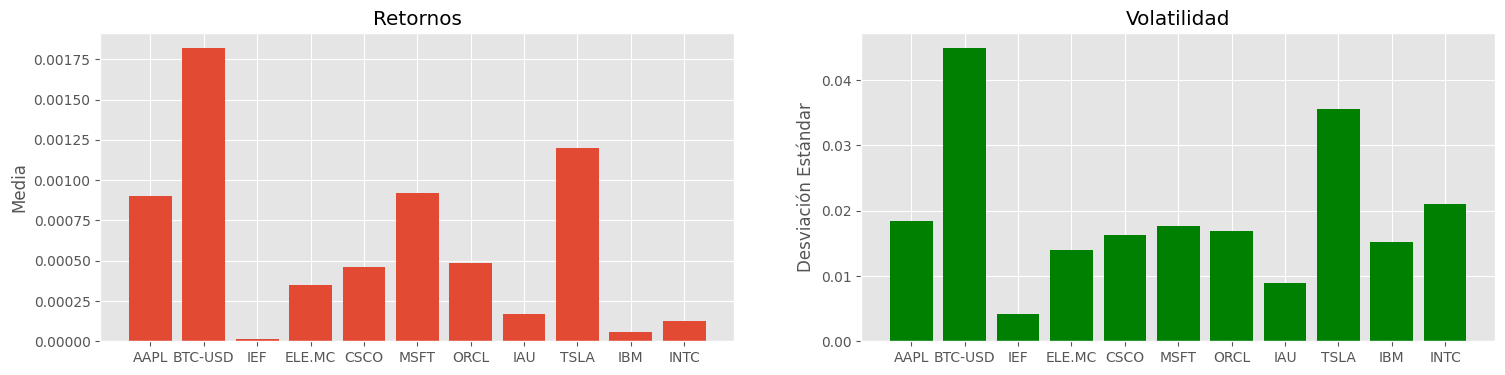

In [3]:
means = retornos.mean()
stds = retornos.std()

# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(means.index, means.values)
axes[0].set_ylabel('Media')
axes[0].set_title('Retornos')

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(stds.index, stds.values,color='green')
axes[1].set_ylabel('Desviación Estándar')
axes[1].set_title('Volatilidad')



In [4]:
# Crear un gráfico de líneas con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=retornos.loc['2016-05-01':,  :].index, 
                         y=retornos.loc['2016-05-01':,  :]['BTC-USD'], 
                         mode='lines',
                         name='BTC-USD'))

fig.add_trace(go.Scatter(x=retornos.loc['2016-05-01':,  :].index, 
                         y=retornos.loc['2016-05-01':,  :]['IEF'], 
                         mode='lines',
                         name='IEF')) #iShares 7-10 Year Treasury Bond ETF

# Añadir títulos
fig.update_layout(
    title="COMPARACIÓN ACTIVOS CON MUCHA Y POCA VOLATILIDAD",
    title_font=dict(size=18),  # Ajusta el tamaño del título
    title_x=0.5,  # Centra el título
    yaxis_title="Retornos diarios %",
    margin=dict(l=20, r=20, b=20, t=40),  # Ajusta los márgenes para hacer los bordes más pequeños
)

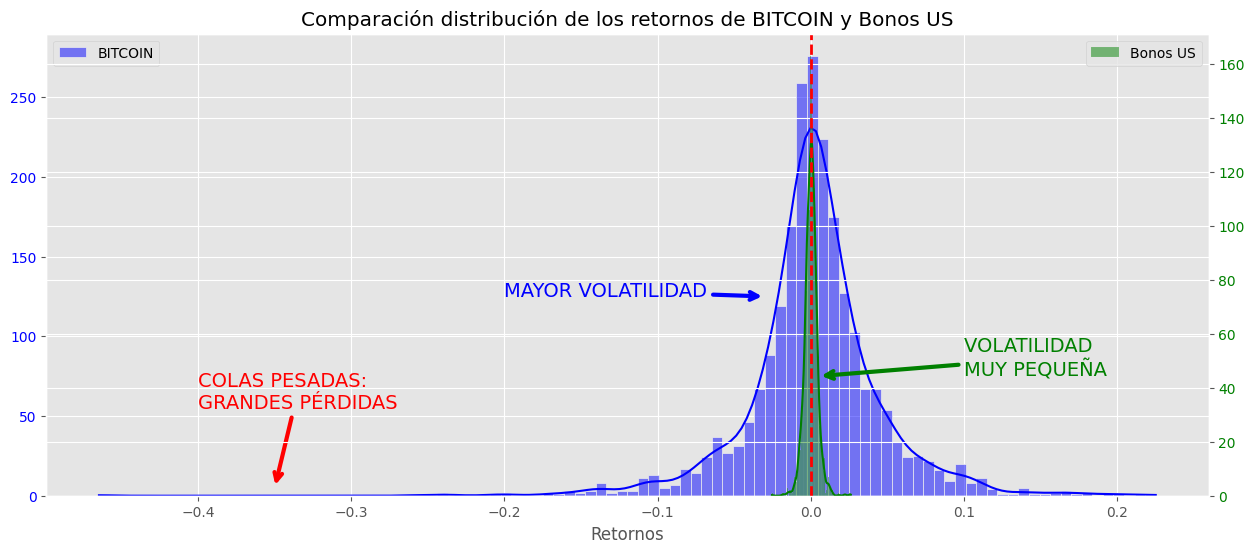

In [5]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Crear el primer gráfico con sns.histplot
sns.histplot(data=retornos, x='BTC-USD', ax=ax1, bins=100, color='blue', kde=True, alpha=0.5, label='BITCOIN')
ax1.set_xlabel('Retornos')
ax1.set_ylabel('', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# # Añadir texto en ax2
# text_x = -0.4
# text_y = 25

#ax1.text(-0.2, 125, f"MAYOR VOLATILIDAD", fontsize=12, color='blue')

ax1.annotate('MAYOR VOLATILIDAD', xy=(-0.03, 125), xytext=(-0.2, 125),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='blue'),
            fontsize=14, color='blue')

ax1.annotate('VOLATILIDAD \nMUY PEQUEÑA', xy=(0.005, 75), xytext=(0.1, 75),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='green'),
            fontsize=14, color='green')

ax1.annotate('COLAS PESADAS: \nGRANDES PÉRDIDAS', xy=(-0.35, 5), xytext=(-0.4, 55),
            arrowprops=dict(arrowstyle='->', linewidth=3, color='red'),
            fontsize=14, color='RED')



# Duplicar el eje Y para el segundo gráfico
ax2 = ax1.twinx()

# Crear el segundo gráfico con sns.histplot
sns.histplot(data=retornos, x='IEF', ax=ax2, bins=100, color='green', kde=True, alpha=0.5, label='Bonos US')
ax2.set_ylabel('', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Añadir una línea vertical en el eje X en 0
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
# Configurar título y mostrar el gráfico
plt.title('Comparación distribución de los retornos de BITCOIN y Bonos US')
plt.show()

**CONCLUSIÓN: LOS RETORNOS NO SIGUEN UNA DISTRIBUCIÓN NORMAL**

* Las colas de la distribución de los retornos son más pesadas que las de una distribución normal.

* Esto quiere decir que hay más probabilidad de que ocurran eventos extremos (tanto positivos como negativos) de lo que cabría esperar si los retornos siguieran una distribución normal.

* Por lo general, la cola izquierda es más pesada que la derecha, lo que quiere decir que hay más probabilidad de que ocurran eventos negativos extremos que positivos extremos.

**CONSECUENCIA: PARA ESTIMAR ADECUADAMENTE EL RIESGO, LA VOLATILIDAD NO ES SUFICIENTE**

Necesitamos más información para caracterizar los activos. Necesitamos conceptos como:

* Asimetría y curtosis

* VaR

* CVaR

* Ratio de sharpe
  
* Ratio de Infomación
  
* Ratio de Treinor
  
* Ratio de Sortino
  
* Máximo Drawdown
  
* Tiempo de recuperación
  
* Ratio de Calmar
  
* Bull Beta
  
* Bear Beta


## VaR

El Valor en Riesgo (VaR) es una medida del riesgo de mercado de un activo o una cartera de activos. Se define como la pérdida máxima que se espera que un activo o una cartera de activos sufra en un período de tiempo determinado con un cierto nivel de confianza.

Por ejemplo, si el VaR diario de una acción es de 10 de euros con un nivel de confianza del 95%, esto significa que el 95% de los días perderemos menos de 10 euros.

Facilita la estimación de la cantidad máxima que podría perderse en el mercado, proporcionando así una base para determinar el capital necesario para mantener la posición.

Protegerse frente a grandes pérdidas por la concentración de riesgos que resultarían inaceptables.

Para calcular el VaR existen tres métodos:

* **Método paramétrico**: Se asume que los retornos siguen una distribución normal.

* **Método históricos**: Se calcula el VaR directamente a partir de los datos históricos.

* **Método de simulación**: Se simulan los retornos de la acción y se calcula el VaR a partir de los retornos simulados.

Antes de nada, vamos a calcular los datos que necesitaremos:


### VaR paramétrico

El **VaR paramétrico** es una técnica para estimar el riesgo de pérdida de una cartera de inversiones. Se basa en la suposición de que los rendimientos de los activos siguen una distribución normal.

**Una hipótesis importante es que las distribuciones son simétricas**.

Los pasos para calcular el VaR paramétrico son:

- Estimar μ y σ de los rendimientos.
  
- Elegir el nivel de confianza (ej. 95%).
  
- Usar ppf para obtener el valor correspondiente. La función ppf es la inversa de la Función de Distribución Acumulada (CDF) para una distribución normal. La vamos a usar para calcular el valor de la variable aleatoria bajo la distribución normal para el cual la probabilidad acumulada hasta ese punto es 1−confianza.

- Otra metodología para determinar este cálculo implica la utilización de la distribución normal estándar, donde la media (μ) es igual a 0 y la desviación estándar (σ) es 1, junto con el valor Z. Este último se puede definir como la cantidad de desviaciones estándar a las que un determinado punto se sitúa de la media. Dado que el cálculo del Valor en Riesgo (VaR) se enfoca exclusivamente en las pérdidas, adoptando así un enfoque unilateral, los valores de Z que comúnmente se emplean son:
    - 95% implica $z = 1,65$
    - 99% implica $z = 2,33$

In [3]:
def var_gaussian(r, level=5):
    """
    Devuelve el VaR Gaussiano Paramétrico de una Serie o DataFrame
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_gaussian, level=level)
    
    elif isinstance(r, pd.Series):
        # calcula el valor Z asumiendo que es una normal
        z = norm.ppf(level/100)
        return -(r.mean() + z*r.std())
    
    else:
        raise TypeError("Esperamos una Serie o DataFrame")

In [7]:
var_95_gauss = var_gaussian(retornos)
var_99_gauss = var_gaussian(retornos, level=1)

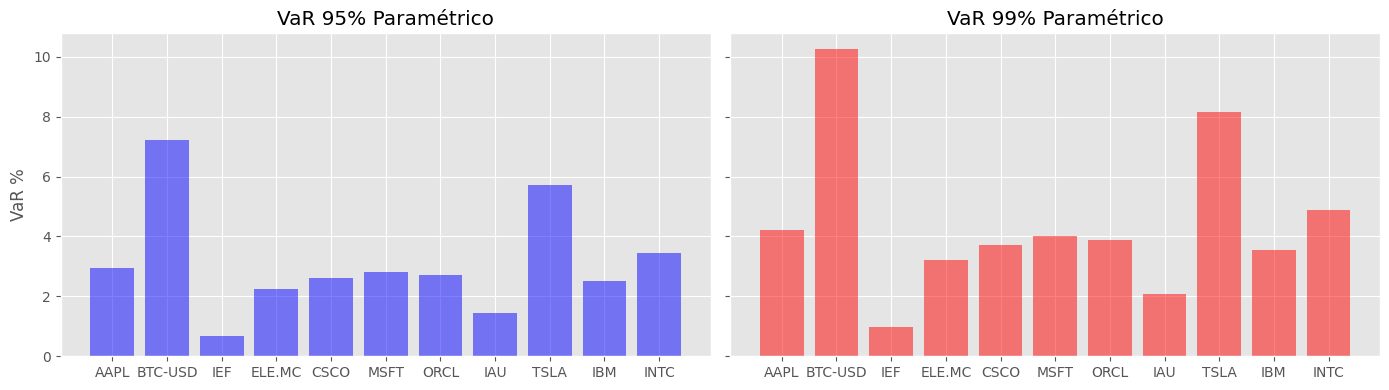

In [8]:
# Configura el tamaño de la figura y crea subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)  # 1 fila, 2 columnas, ajusta el tamaño como necesario

# Gráfica para var_95_gauss
axs[0].bar(retornos.columns, var_95_gauss*100, color='blue', alpha=0.5, label='95%')
axs[0].set_title('VaR 95% Paramétrico')  # Establece el título para el primer subplot
#axs[0].legend()  # Muestra la leyenda en el primer subplot
axs[0].set_ylabel('VaR %') # Establece el título del eje Y

# Gráfica para var_99_gauss
axs[1].bar(retornos.columns, var_99_gauss*100, color='red', alpha=0.5, label='99%')
axs[1].set_title('VaR 99% Paramétrico')  # Establece el título para el segundo subplot
#axs[1].legend()  # Muestra la leyenda en el segundo subplot

# Muestra la figura completa con ambos subplots
plt.tight_layout()  # Ajusta automáticamente los subplots para que encajen en la figura
plt.show()


### VaR Histórico

El VaR histórico implica calcular, a partir de rentabilidades pasadas, el peor retorno que se ajusta al nivel de confianza establecido.

Para calcular el VaR histórico, los pasos incluyen determinar el percentil correspondiente a $1−\text{intervalo de confianza}$ de los retornos

In [9]:
def var_historico(r, level=5):
    """
    Devuelve el VaR Histórica de una Serie o DataFrame
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historico, level=level)
    
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    
    else:
        raise TypeError("Esperamos una Serie o DataFrame")

In [10]:
var_95_hist = var_historico(retornos)
var_99_hist = var_historico(retornos, level=1)

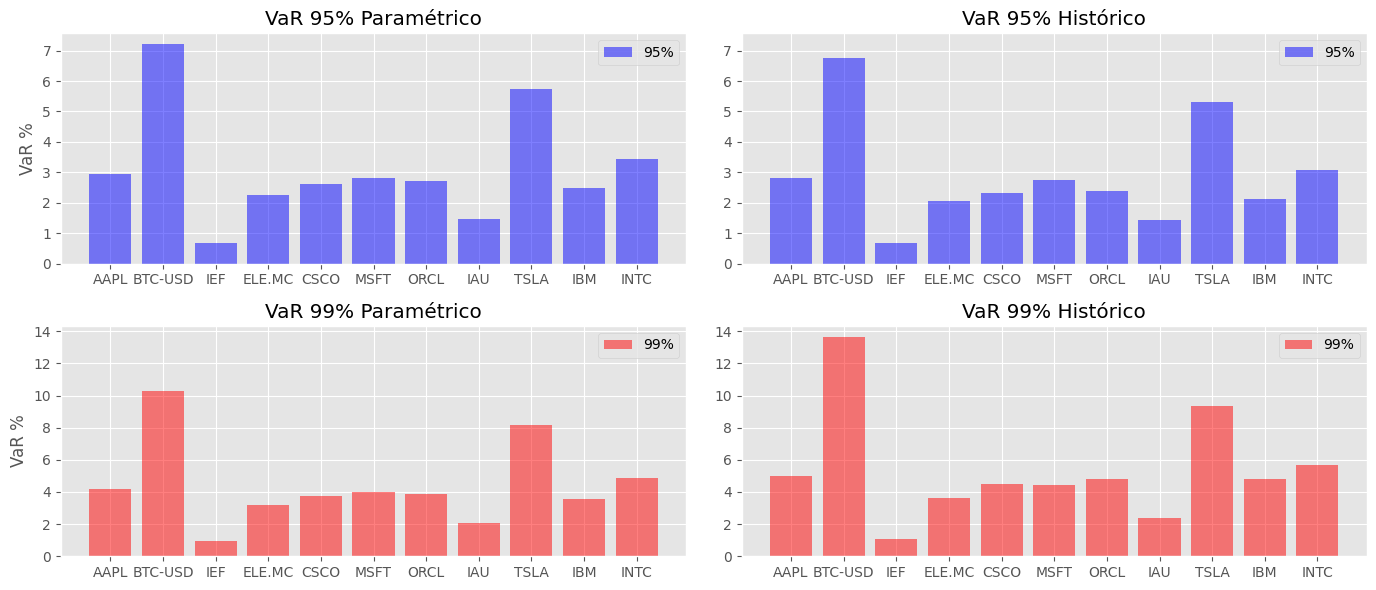

In [11]:
# Configura el tamaño de la figura y crea subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 6))  # 1 fila, 2 columnas, ajusta el tamaño como necesario

# Gráfica para var_95_gauss
axs[0, 0].bar(retornos.columns, var_95_gauss*100, color='blue', alpha=0.5, label='95%')
axs[0, 0].set_title('VaR 95% Paramétrico')  # Establece el título para el primer subplot
axs[0, 0].legend()  # Muestra la leyenda en el primer subplot
axs[0, 0].set_ylabel('VaR %') # Establece el título del eje Y

# Gráfica para var_95_hist
axs[0, 1].bar(retornos.columns, var_95_hist*100, color='blue', alpha=0.5, label='95%')
axs[0, 1].set_title('VaR 95% Histórico')  # Establece el título para el primer subplot
axs[0, 1].legend()  # Muestra la leyenda en el primer subplot

# Ajusta el eje Y de la primera fila para que coincidan
axs[0, 1].set_ylim(axs[0, 0].get_ylim())


# Gráfica para var_99_gauss
axs[1, 0].bar(retornos.columns, var_99_gauss*100, color='red', alpha=0.5, label='99%')
axs[1, 0].set_title('VaR 99% Paramétrico')  # Establece el título para el segundo subplot
axs[1, 0].legend()  # Muestra la leyenda en el segundo subplot
axs[1, 0].set_ylabel('VaR %') # Establece el título del eje Y

# Gráfica para var_99_hist
axs[1, 1].bar(retornos.columns, var_99_hist*100, color='red', alpha=0.5, label='99%')
axs[1, 1].set_title('VaR 99% Histórico')  # Establece el título para el segundo subplot
axs[1, 1].legend()  # Muestra la leyenda en el segundo subplot

# Ajusta el eje Y de la segunda fila para que coincidan
axs[1, 0].set_ylim(axs[1, 1].get_ylim())


# Muestra la figura completa con ambos subplots
plt.tight_layout()  # Ajusta automáticamente los subplots para que encajen en la figura
plt.show()

Veamos la diferencia entre **VaR Paramétrico** y **VaR Histórico** de los Bonos US, cuyos retornos se parecen bastante a una normal

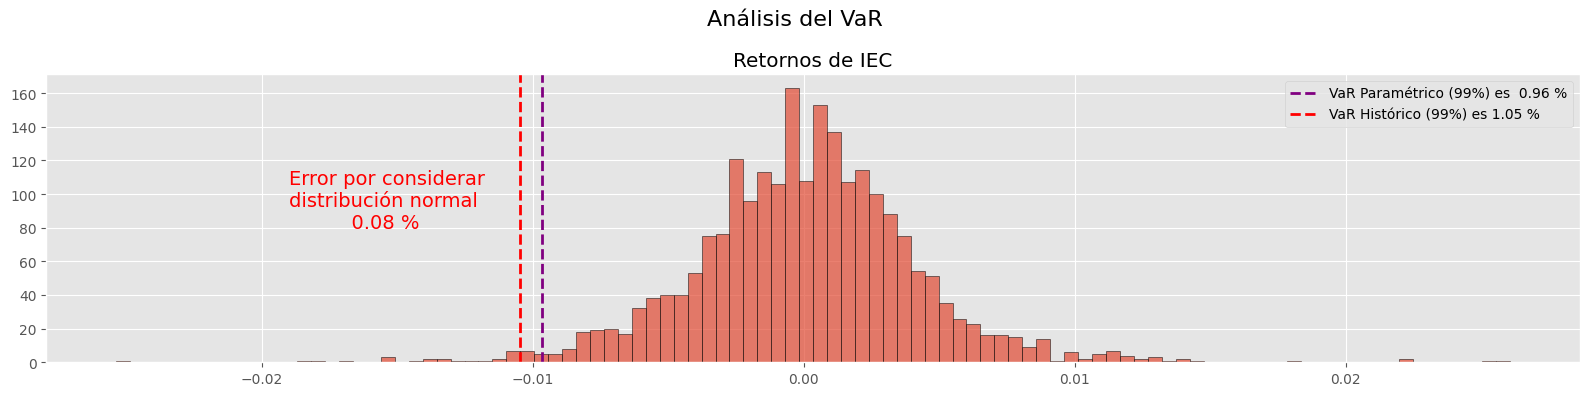

In [12]:
# 3. Hacemos la gráfica para un activo cua distribución de los retornos se parece a la normal IEF - Bonos US

fig, ax = plt.subplots(figsize=(16, 4))


ax.hist(retornos['IEF'], bins=100, edgecolor='black', alpha=0.7)

ax.axvline(x=-var_99_gauss['IEF'], color='purple', linestyle='--', linewidth=2, label=f"VaR Paramétrico (99%) es  {100*var_99_gauss['IEF']:.2f} %")
ax.axvline(x=-var_99_hist['IEF'], color='red', linestyle='--', linewidth=2, label=f"VaR Histórico (99%) es {100*var_99_hist['IEF']:.2f} %")
ax.text(-0.019, 80, f"Error por considerar\ndistribución normal\n          {100*(np.abs(var_99_hist['IEF']-var_99_gauss['IEF'])):.2f} %", fontsize=14, color='RED')

ax.set_ylabel('')
ax.set_title('Retornos de IEC')
ax.legend()


plt.suptitle('Análisis del VaR', fontsize=16)  # Título general
plt.tight_layout()
plt.show()

INTERPRETACIÓN DE LA GRÁFICA:

1- El **Var Normal** es el VaR calculado usando el método paramétrico, es decir, asumiendo que los retornos siguen una distribución normal.

*  Var Normal nos dice que hay un 99% de probabilidad de que la acción pierda menos del 0.96% en un día.

2- El **Var Histórico** es el VaR calculado usando el método no paramétrico, es decir, usando los datos históricos.

* Var Histórico nos dice que hay un 99% de probabilidad de que la acción pierda menos del 1.05% en un día.

Es decir, cometemos un **error al calcular el riesgo del 0.08%** al asumir que los retornos siguen una distribución normal.

Pero, ¿qué ocurre si usamos activos cuyas distribuciones de los retornos no se parecen a una normal?

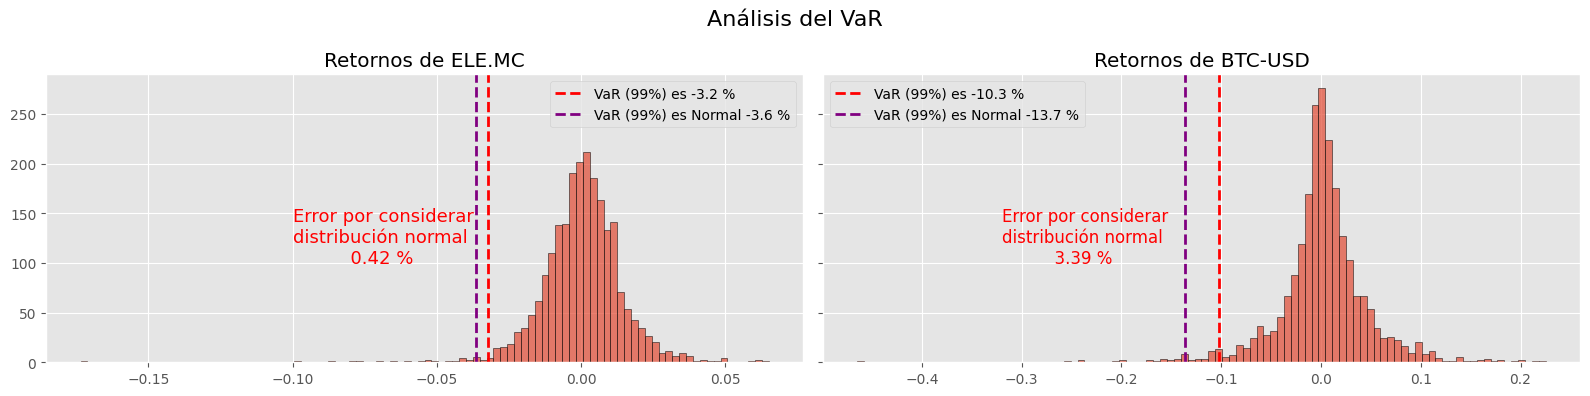

In [13]:
# 3. Hacemos la gráfica para dos activos cuyas distribuciones de los retornos NO se parece a la normal ELE-MC y BTC-USD

fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey='row')
axes[0].hist(retornos['ELE.MC'], bins=100, edgecolor='black', alpha=0.7)
#axes[0].axvline(x=var1_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var1_90:.1f} %')
axes[0].axvline(x=-var_99_gauss['ELE.MC'], color='red', linestyle='--', linewidth=2, label=f"VaR (99%) es {100 * -var_99_gauss['ELE.MC']:.1f} %")
axes[0].axvline(x=-var_99_hist['ELE.MC'], color='purple', linestyle='--', linewidth=2, label=f"VaR (99%) es Normal {100 * -var_99_hist['ELE.MC']:.1f} %")
axes[0].text(-0.10, 100, f"Error por considerar\ndistribución normal\n          {100 *np.abs(-var_99_gauss['ELE.MC']--var_99_hist['ELE.MC']):.2f} %", fontsize=13, color='RED')

axes[0].set_ylabel('')
axes[0].set_title('Retornos de ELE.MC')
axes[0].legend()

axes[1].hist(retornos['BTC-USD'], bins=100, edgecolor='black', alpha=0.7)
#axes[1].axvline(x=var2_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var2_90:.1f} %')
axes[1].axvline(x=-var_99_gauss['BTC-USD'], color='red', linestyle='--', linewidth=2, label=f"VaR (99%) es {100 * -var_99_gauss['BTC-USD']:.1f} %")
axes[1].axvline(x=-var_99_hist['BTC-USD'], color='purple', linestyle='--', linewidth=2, label=f"VaR (99%) es Normal {100 * -var_99_hist['BTC-USD']:.1f} %")
axes[1].text(-0.32, 100, f"Error por considerar\ndistribución normal\n          {100 *np.abs(-var_99_gauss['BTC-USD']--var_99_hist['BTC-USD']):.2f} %", fontsize=12, color='RED')

axes[1].set_ylabel('')
axes[1].set_title('Retornos de BTC-USD')
axes[1].legend()


plt.suptitle('Análisis del VaR', fontsize=16)  # Título general
plt.tight_layout()
plt.show()

Es decir, cometemos un **error al calcular el riesgo del 0.42% y 3.39%**, respectivamente, al asumir que los retornos siguen una distribución normal.

### VaR por simulaciones de Montecarlo


La simulación de Monte Carlo se utiliza para predecir posibles retornos futuros de un activo generando múltiples escenarios basados en un modelo de los retornos, que incluye factores como la media y la volatilidad. Este método crea series de tiempo aleatorias de los retornos futuros, calcula los valores futuros del activo para cada serie y analiza la distribución de estos valores para evaluar el riesgo y el potencial de rendimiento. Es una herramienta flexible que permite a inversores y analistas considerar la incertidumbre y tomar decisiones más informadas.

La simulación de Monte Carlo se divide en dos enfoques principales: el paramétrico y el histórico. 

- El **paramétrico** utiliza distribuciones estadísticas basadas en parámetros (como la media y desviación estándar) para modelar los retornos futuros de un activo, asumiendo una distribución conocida.

- El **histórico** emplea directamente datos de retornos pasados para simular futuros posibles, sin asumir una distribución específica, reflejando más fielmente el comportamiento real del mercado. 

**VaR PARAMÉTRICO POR MONTECARLO**

Los pasos para calcularlo son:

1. Descargar los datos históricos del activo.
   
2. Calcular los retornos logarítmicos o simples de los datos.
   
3. Calcular la media y desviación estándar de los retornos.
   
4. Generar los retornos futuros utilizando una distribución normal con la media y desviación estándar calculadas.
   
5. Generar las series de precios futuros del activo a partir de los retornos futuros simulados.

6. Calcular el VaR con las simulaciones


In [14]:

# Número de días
n_days = 252
#Vamos a simular 1000 escenarios de retornos diarios para el Bitcoin
n_sim = 1000

mu_btc = retornos['BTC-USD'].iloc[:n_days].mean()
sigma_btc = retornos['BTC-USD'].iloc[:n_days].std()

#Vamos a simular 1000 escenarios de retornos diarios para el Bitcoin
n_sim = 1000

In [15]:
# Crear un generador de números aleatorios
rng = np.random.default_rng(seed=42)

# Generar números aleatorios siguiendo una distribución normal
ret_sim = rng.normal(loc=mu_btc, scale=sigma_btc, size= (n_days, n_sim))

In [16]:
#Calculamos los precios simulados
ret_cum_sim = ret_sim.cumsum(axis=0)
btc_ret_sim = precios['BTC-USD'].iloc[0] * np.exp(ret_cum_sim)

In [17]:
#Generamos la fila inicial con el precio inicial
fila_0 = np.ones((1, n_sim))*precios['BTC-USD'].iloc[0]

#Concatenamos la fila inicial con los precios simulados
btc_precios_sim = np.concatenate((fila_0, btc_ret_sim), axis=0)

#Convertimos los precios simulados en un DataFrame de Pandas
btc_precios_sim_df = pd.DataFrame(btc_precios_sim, index=precios.index[:n_days+1], columns=range(n_sim))

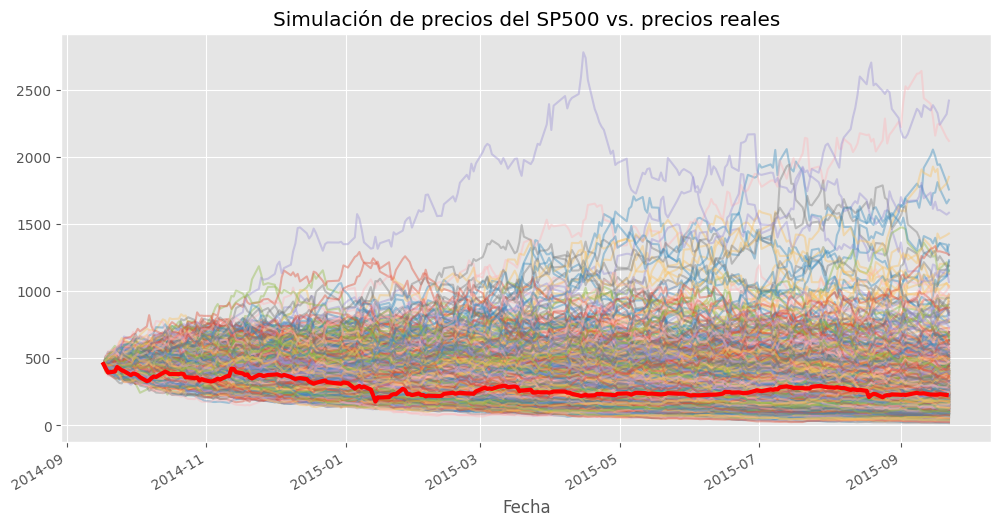

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
btc_precios_sim_df.plot(legend=False, alpha=0.4, ax=ax) #Graficamos los precios simulados
precios['BTC-USD'].iloc[:n_days].plot(ax=ax, color='red', linewidth=3, legend=False) #Graficamos los precios reales
plt.title('Simulación de precios del SP500 vs. precios reales')
plt.xlabel('Fecha')
plt.show()

In [31]:
var_95_montecarlo = btc_precios_sim_df.iloc[-1:].quantile(0.05, axis = 1).values[0]
var_99_montecarlo = btc_precios_sim_df.iloc[-1:].quantile(0.01, axis = 1).values[0]
valor_final = precios['BTC-USD'].iloc[:n_days+1].iloc[-1]

print(f"VaR 95% Montecarlo: {100*(var_95_montecarlo-valor_final)/valor_final:.2f} %")

VaR 95% Montecarlo: -67.04 %


In [136]:
(precios['BTC-USD'].iloc[:n_days+1].values < precios_quantile_evol.iloc[:, 0]).sum()

4

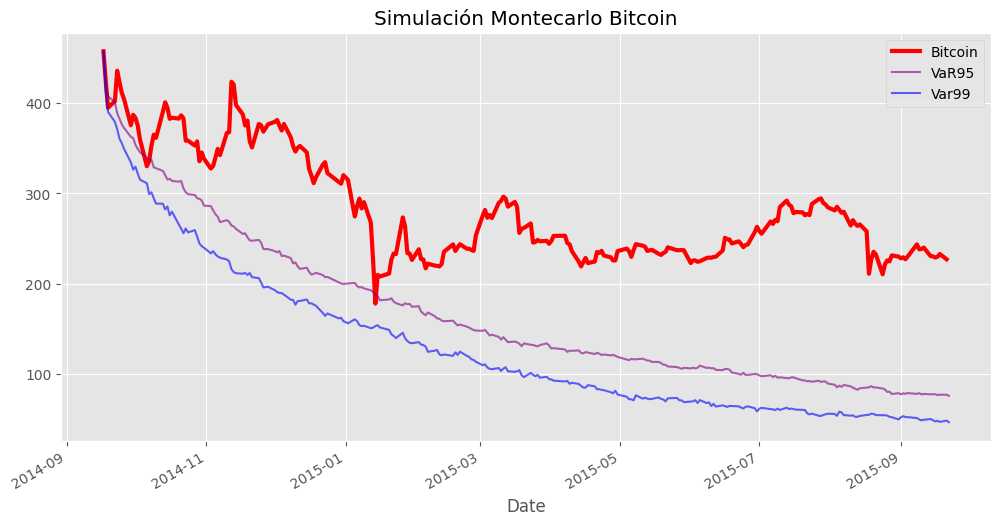

In [43]:
#Calculamos los percentiles 5 y 95 de los precios simulados
precios_quantile_evol = btc_precios_sim_df.quantile(q=[0.01, 0.05],axis=1).T
precios_quantile_evol.columns = ['VaR99', 'VaR95']

#Hacemos la gráfica
fig, ax = plt.subplots(figsize=(12,6))
precios['BTC-USD'].iloc[:n_days].plot(ax=ax, color='red', linewidth=3)
precios_quantile_evol.loc[:, 'VaR95'].plot(ax=ax, color='purple',  alpha=0.6)
precios_quantile_evol.loc[:, 'VaR99'].plot(ax=ax, color='blue',  alpha=0.6)
plt.legend(['Bitcoin', 'VaR95', 'Var99'])
plt.title('Simulación Montecarlo Bitcoin')
plt.show()

In [138]:
# Cuantos días el precio está por debajo del percentil 5
dias_bajo_percentil_5 = (precios['BTC-USD'].iloc[:n_days+1].values < precios_quantile_evol.iloc[:, 0]).sum()
dias_bajo_percentil_5

4

Veamoa ahora lo que ocurre si usamos los datos deel año 2017 para simular los precios del año 2018:

In [18]:
precios_btc_2017 = precios['BTC-USD'].loc['2017']
precios_btc_2018 = precios['BTC-USD'].loc['2018']

retornos_btc_2017 = np.log(precios_btc_2017).diff().dropna()
retornos_btc_2018 = np.log(precios_btc_2018).diff().dropna()

precios_btc_2017.shape, precios_btc_2018.shape

((248,), (247,))

In [12]:
# Número de días
n_days = precios_btc_2018.shape[0]-1
#Vamos a simular 1000 escenarios de retornos diarios para el Bitcoin
n_sim = 1000

mu_btc = retornos_btc_2017.mean()
sigma_btc = retornos_btc_2017.std()


In [13]:
# Crear un generador de números aleatorios
rng = np.random.default_rng(seed=42)

# Generar números aleatorios siguiendo una distribución normal
ret_sim = rng.normal(loc=mu_btc, scale=sigma_btc, size= (n_days, n_sim))

In [14]:
mu_btc, sigma_btc

(0.010696183316546043, 0.05699541209502232)

In [19]:
retornos_btc_2018.mean(), retornos_btc_2018.std()

(-0.005638409494281795, 0.0502589807863962)

In [15]:
#Calculamos los precios simulados
ret_cum_sim = ret_sim.cumsum(axis=0)
btc_ret_sim = precios_btc_2018.iloc[0] * np.exp(ret_cum_sim)

In [35]:
btc_precios_sim_df

0              1              2             3    \
Date                                                                   
2018-01-02  14982.099609   14982.099609   14982.099609  14982.099609   
2018-01-03  15408.507438   14271.691926   15804.972214  15977.159739   
2018-01-04  15521.670316   13837.857919   15601.978103  16743.102000   
2018-01-05  15289.620254   13465.789692   16164.709818  17167.826538   
2018-01-08  16594.294476   14154.659386   18275.966461  15887.202251   
...                  ...            ...            ...           ...   
2018-12-21  41152.372319  192726.460988  340359.255511  92185.160230   
2018-12-24  40187.739224  199384.001602  381440.299948  87986.013690   
2018-12-27  39916.610235  220676.807537  413137.568516  93595.934275   
2018-12-28  38578.161951  217962.680352  481612.319513  97147.616438   
2018-12-31  40453.709257  233589.510340  458303.816491  89408.786903   

                      4              5              6             7    \
Date                                                                    
2018-01-02   14982.099609   14982.099609   14982.099609  14982.099609   
2018-01-03   13549.535385   14060.002368   15253.952181  14872.709190   
2018-01-04   13697.578221   14489.447791   16018.210876  14714.889543   
2018-01-05   12779.579624   15613.006846   16103.776012  13960.586132   
2018-01-08   12723.115151   15370.328429   14545.171826  14989.771257   
...                   ...            ...            ...           ...   
2018-12-21  157729.923576  217607.285454  514334.658826  79062.994125   
2018-12-24  163454.703934  224424.308921  504003.632015  84632.853701   
2018-12-27  151694.038432  238854.964258  502495.697300  82047.043940   
2018-12-28  136417.770479  254245.468122  498886.314617  86661.415153   
2018-12-31  150842.353610  259348.885271  484648.282393  94906.534803   

                     8              9    ...           990            991  \
Date                                     ...                                
2018-01-02  14982.099609   14982.099609  ...  14982.099609   14982.099609   
2018-01-03  15128.716966   14424.565956  ...  15913.534732   16475.331025   
2018-01-04  15964.916286   14897.913891  ...  16446.878549   17178.202440   
2018-01-05  17267.826089   15604.791526  ...  17242.038631   19050.471910   
2018-01-08  17186.596840   16451.715950  ...  17711.276960   18153.229272   
...                  ...            ...  ...           ...            ...   
2018-12-21  58511.039401  492978.677483  ...  51876.556122  182423.119556   
2018-12-24  64667.067460  525231.101014  ...  54018.326388  166634.016840   
2018-12-27  64991.038392  538110.822313  ...  56844.597830  150937.939047   
2018-12-28  56962.873735  561796.292306  ...  62357.055860  154327.162298   
2018-12-31  56343.113449  573838.527829  ...  68879.058331  150569.403528   

                      992           993            994           995  \
Date                                                                   
2018-01-02   14982.099609  1.498210e+04   14982.099609  1.498210e+04   
2018-01-03   16773.884337  1.632162e+04   15048.795692  1.545072e+04   
2018-01-04   17179.605249  1.743007e+04   15286.990965  1.596973e+04   
2018-01-05   17306.012539  2.018873e+04   15029.771936  1.545150e+04   
2018-01-08   17190.742381  1.961854e+04   15721.583344  1.502499e+04   
...                   ...           ...            ...           ...   
2018-12-21  529802.506052  1.130191e+06  240723.002505  1.878510e+06   
2018-12-24  512941.875666  1.076339e+06  234571.344478  2.061120e+06   
2018-12-27  521230.264328  1.194993e+06  242299.321188  1.990298e+06   
2018-12-28  511699.990012  1.280400e+06  199499.900266  2.177158e+06   
2018-12-31  507323.641350  1.493604e+06  184001.501154  2.158088e+06   

                     996            997            998           999  
Date                                                                  
2018-01-02  1.498210e+04   14982.099609   14982.09960

In [36]:
#Generamos la fila inicial con el precio inicial
fila_0 = np.ones((1, n_sim))*precios_btc_2018.iloc[0]

#Concatenamos la fila inicial con los precios simulados
btc_precios_sim = np.concatenate((fila_0, btc_ret_sim), axis=0)

#Convertimos los precios simulados en un DataFrame de Pandas
btc_precios_sim_df = pd.DataFrame(btc_precios_sim, index=precios_btc_2018.index[:n_days+1], columns=range(n_sim))

In [38]:
precios_btc_2018.plot(ax=ax, color='red', linewidth=3, legend=False) #Graficamos los precios reales

<Axes: title={'center': 'Simulación de precios del SP500 vs. precios reales'}, xlabel='Date'>

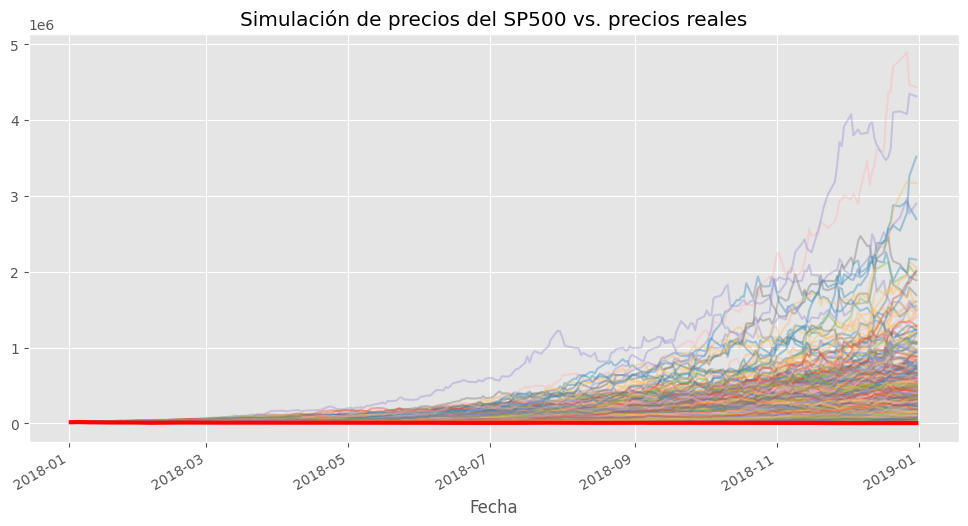

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
btc_precios_sim_df.plot(legend=False, alpha=0.4, ax=ax) #Graficamos los precios simulados
precios_btc_2018.plot(ax=ax, color='red', linewidth=3, legend=False) #Graficamos los precios reales
plt.title('Simulación de precios del SP500 vs. precios reales')
plt.xlabel('Fecha')
plt.show()

In [39]:
precios_quantile_evol

VaR99         VaR95
Date                                  
2018-01-02    457.334015    457.334015
2018-01-03  13256.823416  13756.047108
2018-01-04  12509.372607  13252.676515
2018-01-05  12224.691255  13150.484590
2018-01-08  12051.432983  12814.496030
...                  ...           ...
2018-12-21  26715.711721  46313.382763
2018-12-24  25979.138749  47574.667574
2018-12-27  25696.294646  47236.787698
2018-12-28  26507.651558  48312.132863
2018-12-31  27504.322132  48659.503295

[247 rows x 2 columns]

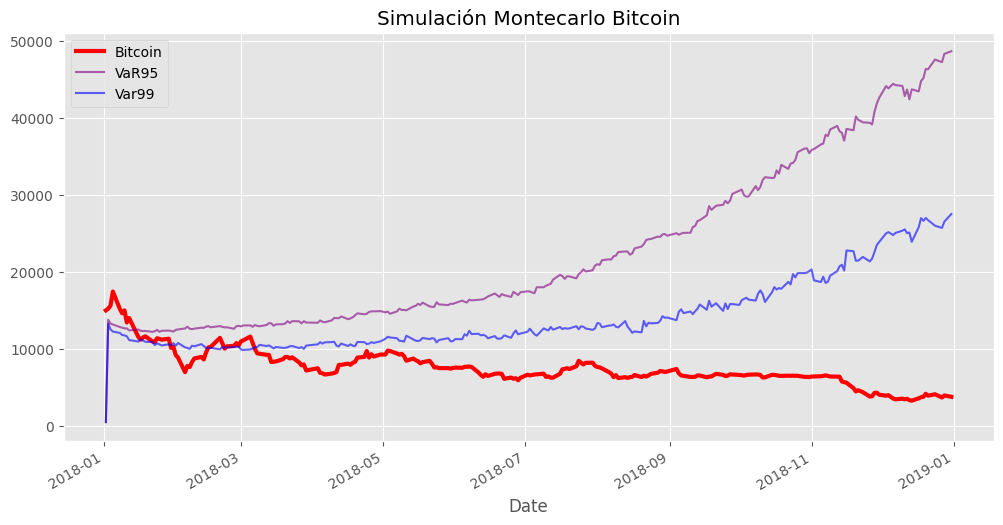

In [20]:
#Calculamos los percentiles 5 y 95 de los precios simulados
precios_quantile_evol = btc_precios_sim_df.quantile(q=[0.01, 0.05],axis=1).T
precios_quantile_evol.columns = ['VaR99', 'VaR95']

#Hacemos la gráfica
fig, ax = plt.subplots(figsize=(12,6))
precios_btc_2018.plot(ax=ax, color='red', linewidth=3)
precios_quantile_evol.loc[:, 'VaR95'].plot(ax=ax, color='purple',  alpha=0.6)
precios_quantile_evol.loc[:, 'VaR99'].plot(ax=ax, color='blue',  alpha=0.6)
plt.legend(['Bitcoin', 'VaR95', 'Var99'])
plt.title('Simulación Montecarlo Bitcoin')
plt.show()

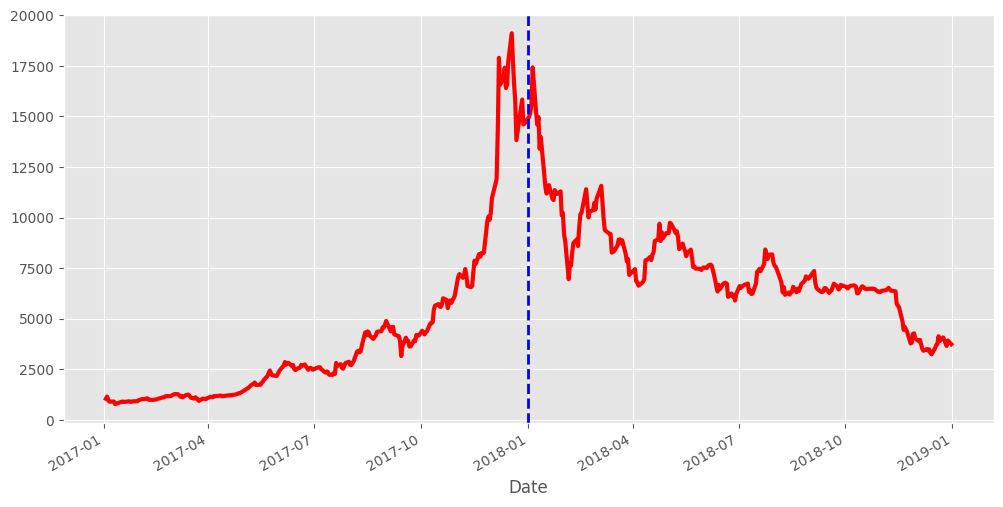

In [23]:
precios['BTC-USD'].loc['2017':'2018'].plot(figsize=(12, 6), color='red', linewidth=3)
plt.axvline(x='2018-01-01', color='blue', linestyle='--', linewidth=2)

**VaR HISTÓTRICO POR MONTECARLO**

Los pasos para calcularlo son:

1. Descargar los datos históricos del activo.
   
2. Calcular los retornos logarítmicos o simples de los datos.
   
3. Generar los retornos futuros utilizando retornos históricos.

4. Calcular los precios futuros usando los retornos
   
4. Calcular el VaR con los precios del último día.

In [91]:
ret_sim_choice = rng.choice(retornos['BTC-USD'], size=n_sim, replace=True)

var_95_mont_hist = np.percentile(ret_sim_choice, 1)
var_95_mont_hist

-0.13322321728215947

In [63]:
#Calculamos los precios simulados
ret_cum_sim = ret_sim.cumsum(axis=0)
sp500_sim = sp500_df_19.iloc[0].values[0]* np.exp(ret_cum_sim)

In [64]:
#Generamos la fila inicial con el precio inicial
fila_0 = np.ones((1, n_sim))*sp500_df_19.iloc[0].values[0]

#Concatenamos la fila inicial con los precios simulados
precios_sim = np.concatenate((fila_0, sp500_sim), axis=0)

#Convertimos los precios simulados en un DataFrame de Pandas
precios_sim_df = pd.DataFrame(precios_sim, index=sp500_df_19.index, columns=range(n_sim))

NameError: name 'precios_sim_df' is not defined

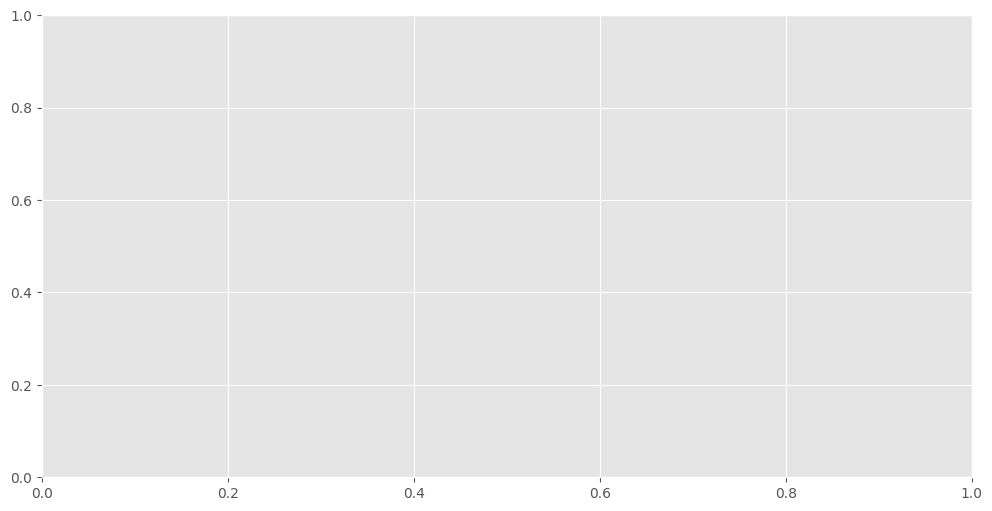

In [40]:
#Calculamos los percentiles 5 y 95 de los precios simulados
precios_quantile_evol = btc_precios_sim_df.quantile(q=[0.01, 0.05],axis=1).T
precios_quantile_evol.columns = ['VaR99', 'VaR95']

fig, ax = plt.subplots(figsize=(12, 6))
precios_sim_df.plot(legend=False, alpha=0.4, ax=ax) #Graficamos los precios simulados
sp500_df_19.plot(ax=ax, color='red', linewidth=3, legend=False) #Graficamos los precios reales
plt.title('Simulación de precios del SP500 vs. precios reales')
plt.xlabel('Fecha')
plt.show()

___

## CVaR

+ El VaR tiene un problema: no considera cómo son los retornos que están por debajo del VaR. Es decir, dos activos pueden tener el mismo VaR pero uno puede tener retornos muy negativos y el otro no.

+ Para solucionar este problema se usa el CVaR o Conditional Value at Risk. El CVaR es la **media de los retornos que están por debajo del VaR**.

In [26]:
# Calcular el CVAR al 95%
cvar_95_ele = np.mean(retornos['ELE.MC'][retornos['ELE.MC'] < var_95_ele])
cvar_95_ief = np.mean(retornos['IEF'][retornos['IEF'] < var_95_ief])

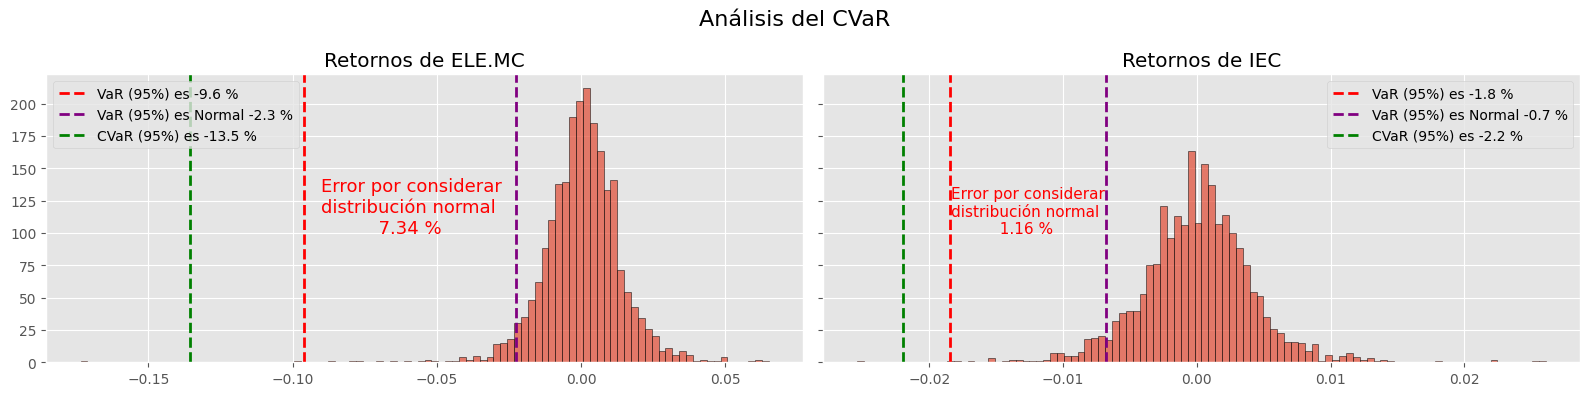

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey='row')
axes[0].hist(retornos['ELE.MC'], bins=100, edgecolor='black', alpha=0.7)
#axes[0].axvline(x=var1_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var1_90:.1f} %')
axes[0].axvline(x=var_95_ele, color='red', linestyle='--', linewidth=2, label=f'VaR (95%) es {100 * var_95_ele:.1f} %')
axes[0].axvline(x=varn_95_ele, color='purple', linestyle='--', linewidth=2, label=f'VaR (95%) es Normal {100 * varn_95_ele:.1f} %')
axes[0].text(-0.09, 100, f"Error por considerar\ndistribución normal\n          {100 *np.abs(var_95_ele-varn_95_ele):.2f} %", fontsize=13, color='RED')
axes[0].axvline(x=cvar_95_ele, color='green', linestyle='--', linewidth=2, label=f'CVaR (95%) es {100 * cvar_95_ele:.1f} %')

axes[0].set_ylabel('')
axes[0].set_title('Retornos de ELE.MC')
axes[0].legend()

axes[1].hist(retornos['IEF'], bins=100, edgecolor='black', alpha=0.7)
#axes[1].axvline(x=var2_90, color='green', linestyle='--', linewidth=2, label=f'VaR (90%) es {100 * var2_90:.1f} %')
axes[1].axvline(x=var_95_ief, color='red', linestyle='--', linewidth=2, label=f'VaR (95%) es {100 * var_95_ief:.1f} %')
axes[1].axvline(x=varn_95_ief, color='purple', linestyle='--', linewidth=2, label=f'VaR (95%) es Normal {100 * varn_95_ief:.1f} %')
axes[1].text(-0.0184, 100, f"Error por considerar\ndistribución normal\n          {100 *np.abs(var_95_ief-varn_95_ief):.2f} %", fontsize=11, color='RED')
axes[1].axvline(x=cvar_95_ief, color='green', linestyle='--', linewidth=2, label=f'CVaR (95%) es {100 * cvar_95_ief:.1f} %')

axes[1].set_ylabel('')
axes[1].set_title('Retornos de IEC')
axes[1].legend()


plt.suptitle('Análisis del CVaR', fontsize=16)  # Título general
plt.tight_layout()
plt.show()

En términos más prácticos, el CVaR responde a la pregunta: **"Si la pérdida supera el VaR, ¿cuánto esperamos perder en promedio?"**

### Optimización CVaR de una cartera 

In [2]:
# Date range
start = '2015-01-01'
end = '2019-12-30'

# Assets todos con retornos positivos
assets = ['BA', 'BAX', 'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'F', 'GE', 'HPQ', 
        'JCI', 'JPM','KHC', 'LUV', 'MMC', 'MO', 'NI', 'PCAR', 'PSA', 'SEE', 
        'T', 'TGT', 'TMO','TXT', 'VZ', 'ZION']

# Downloading data
prices = yf.download(assets, start = start, end = end)['Adj Close']

#Calculamos los retornos logaritmicos
returns = np.log(prices).diff().dropna()

[*********************100%%**********************]  26 of 26 completed


In [3]:
prices.columns = assets

num_data, num_act = returns.shape

In [4]:
ret = returns.to_numpy()
retornos_esperados = returns.mean().to_numpy()
alpha = 0.05

In [5]:
pesos = cp.Variable(num_act)
t = cp.Variable()
ui = cp.Variable(num_data)

riesgo = t + cp.sum(ui)/(alpha * num_data)
retornos = retornos_esperados.T @ pesos

In [6]:
restricciones = [
    -ret @ pesos - t - ui <= 0,
    ui >= 0,
    cp.sum(pesos) == 1,
    pesos >= 0,
]

In [7]:
objective = cp.Minimize(riesgo)

# Solve the problem
prob = cp.Problem(objective, restricciones)
prob.solve()


0.016182673912765545

In [8]:
#ponemos a cero los pesos menores a 10**-4

pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value])
pesos_ajustados

array([0.   , 0.007, 0.071, 0.013, 0.027, 0.085, 0.   , 0.   , 0.   ,
       0.   , 0.015, 0.   , 0.   , 0.011, 0.144, 0.027, 0.064, 0.   ,
       0.244, 0.   , 0.033, 0.038, 0.   , 0.   , 0.221, 0.   ])

In [9]:
activos_filtrados = [asset for i, asset in enumerate(assets) if pesos_ajustados[i] > 0] # Activos con pesos mayores a 10**-4
pesos_filtrados = [x for x in pesos_ajustados if x > 0] # Pesos mayores a 10**-4

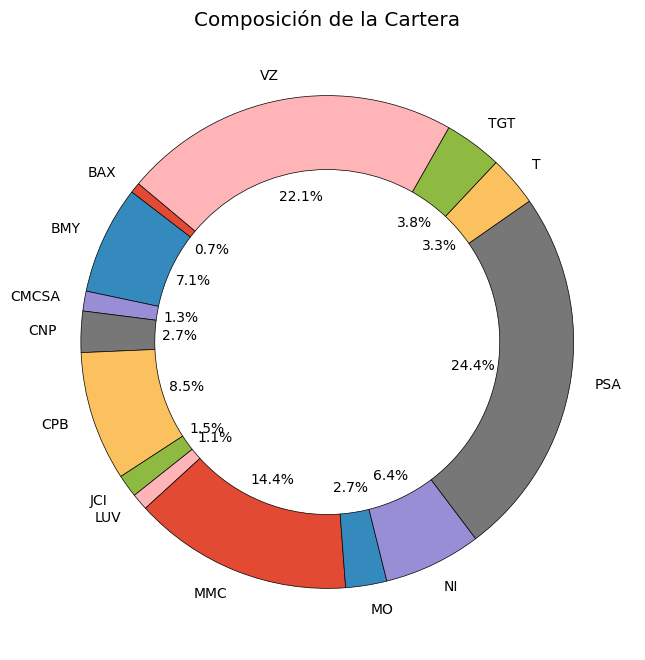

In [10]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_filtrados, labels=activos_filtrados, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera')

# Mostrar el gráfico
plt.show()

Calcula la cartera que minimice el CVaR y que no invierta más de 10% en un único activo

In [28]:
pesos = cp.Variable(num_act)
t = cp.Variable()
ui = cp.Variable(num_data)

riesgo = t + cp.sum(ui)/(alpha * num_data)
retornos = retornos_esperados.T @ pesos

In [27]:
retornos_esperados.mean(), retornos_esperados.max(), retornos_esperados.min()

(0.0003219262579043891, 0.000858851887217026, -0.0006238559922886828)

In [33]:
restricciones = [
    -ret @ pesos - t - ui <= 0,
    ui >= 0,
    cp.sum(pesos) == 1,
    pesos >= 0,
    pesos <= 0.1,    
]

In [34]:
objective = cp.Minimize(riesgo)

# Solve the problem
prob = cp.Problem(objective, restricciones)
prob.solve()

0.016669897599214

In [35]:
#ponemos a cero los pesos menores a 10**-4

pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value])
activos_filtrados = [asset for i, asset in enumerate(assets) if pesos_ajustados[i] > 0] # Activos con pesos mayores a 10**-4
pesos_filtrados = [x for x in pesos_ajustados if x > 0] # Pesos mayores a 10**-4

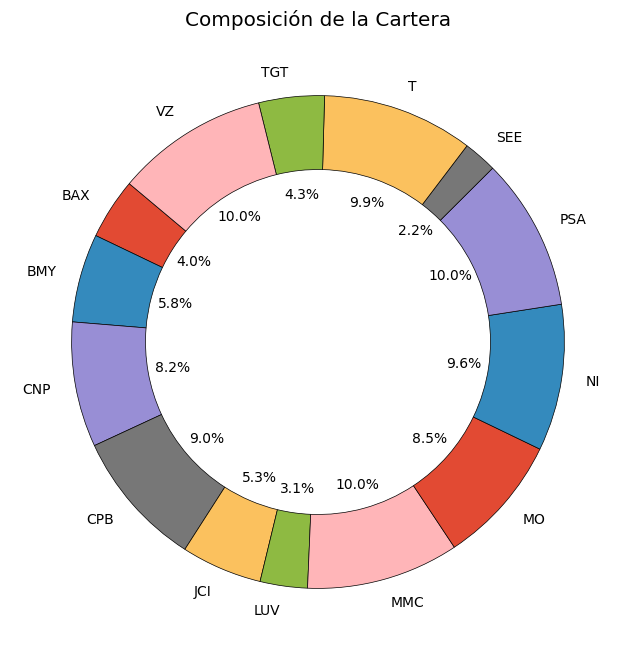

In [36]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_filtrados, labels=activos_filtrados, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera')

# Mostrar el gráfico
plt.show()

___

## Maximum Drawdown

El drawdown es una medida de riesgo que refleja la máxima caída desde un pico hasta un valle en el valor de una inversión antes de alcanzar un nuevo máximo.

Esta métrica es esencial para entender la volatilidad y el riesgo real asociado a una estrategia de inversión.

A continuación, vamos a explorar algunos ejemplos de condiciones comerciales que se pueden establecer en relación con el drawdown, ilustrando su importancia en la gestión del riesgo:

* Es improbable la aceptación de un drawdown del 50%.
* Criterio de terminación: drawdown del 20%.
* Umbral de alerta: drawdown del 15%.
* Máximo período tolerado bajo el nivel de referencia: 1 año.

Max Drawdown es una medida del riesgo en las finanzas que nos ayuda a entender cuánto se puede perder en una inversión o cartera en el peor momento antes de que empiece a recuperarse. Para calcularlo:

1. **Encuentra el punto más alto**: Identifica el valor máximo alcanzado por la inversión hasta un cierto instante de tiempo.

2. **Encuentra el punto más bajo mientras no se supere el máximo**: Desde el punto más alto encontrado en el paso 1, busca el valor más bajo que alcanzó la inversión mientras no se haya superado ese máximo. Este valor más bajo representa la mayor caída o drawdown.

3. **Calcula el drawdown máximo**: Resta el valor más bajo del punto más alto encontrado en el paso 1. El resultado es el drawdown máximo

4. **Reinicia el cálculo después de superar el punto más alto**: Después de que el valor de la inversión supere el punto más alto anterior (el máximo registrado), comienza un nuevo cálculo de drawdown máximo. Esto significa que cualquier pérdida anterior se considera parte del drawdown pasado, y se inicia un nuevo registro del drawdown a partir del nuevo punto más alto.

El drawdown máximo evoluciona a medida que la inversión alcanza nuevos máximos. 

Vamos a calcular el Max Drawdown de un activo.

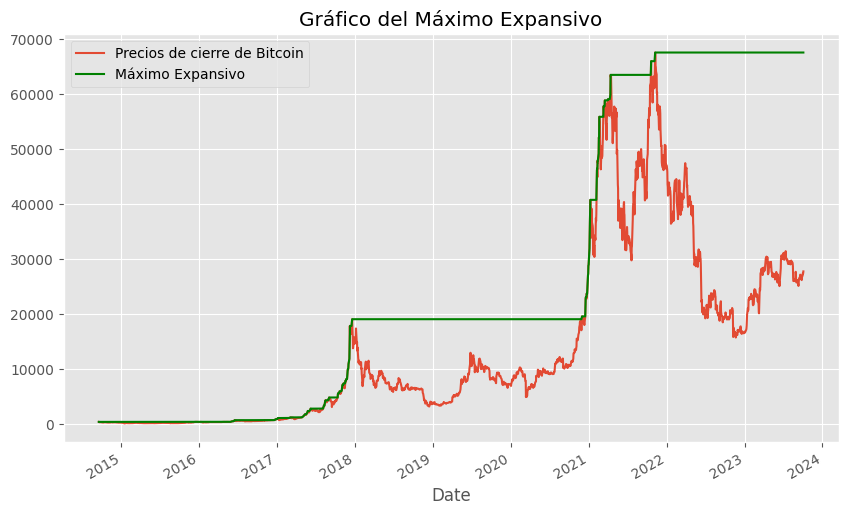

In [29]:
expanding_max = precios["BTC-USD"].expanding().max()

fig, ax = plt.subplots(figsize=(10, 6))

precios["BTC-USD"].plot(label='Precios de cierre de Bitcoin');
expanding_max.plot(label='Máximo Expansivo', color='green');
plt.legend()
plt.title('Gráfico del Máximo Expansivo')
plt.show()

Ahora calculo el drawdown máximo de cada activo siguiendo la formula:

$$Drawdown = \frac{P_t - P_{max}}{P_{max}} = \frac{P_t}{P_{max}}-1$$

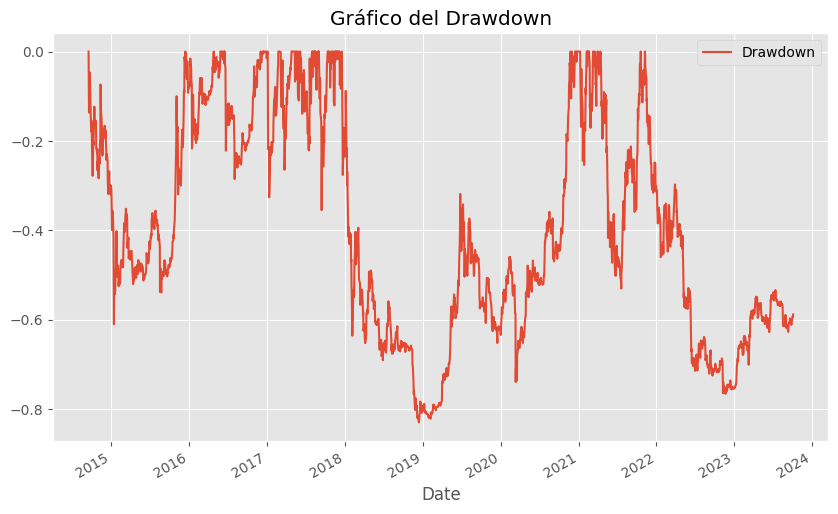

In [31]:
drawdown = precios["BTC-USD"] / expanding_max - 1
drawdown.plot(label = 'Drawdown', figsize=(10, 6));
plt.legend()
plt.title('Gráfico del Drawdown');

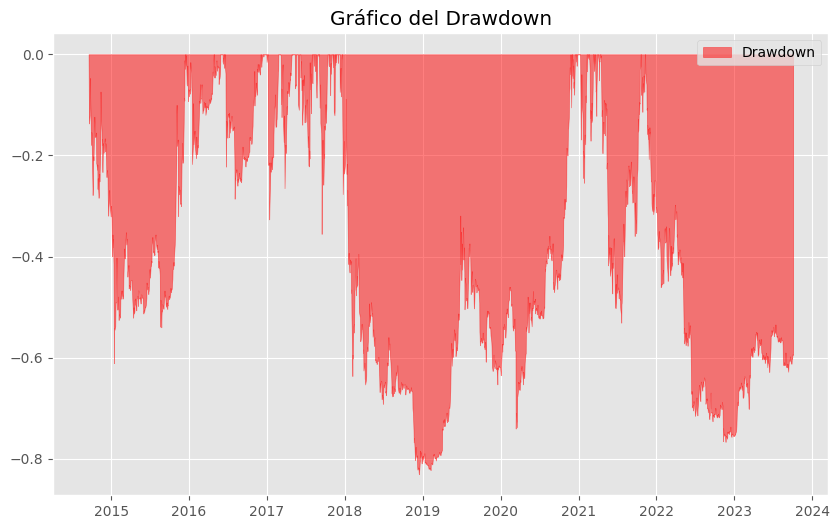

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.fill_between(precios["BTC-USD"].index.values, drawdown, label='Drawdown', color='red', alpha=0.5);

plt.legend()
plt.title('Gráfico del Drawdown');

### Optimización CDaR de una cartera 

In [37]:
pesos = cp.Variable(num_act)
t = cp.Variable()
uj = cp.Variable(num_data)
dj = cp.Variable(num_data+1)

riesgo = t + cp.sum(uj)/(alpha * num_data)
retornos = retornos_esperados.T @ pesos

In [46]:
restricciones = [dj[1:] - t - uj <= 0,
                dj[1:] >= dj[:-1] - ret @ pesos,
                uj >= 0,
                dj >= 0,
                dj[0] == 0,
                cp.sum(pesos) == 1,
                pesos >= 0,
#                retornos >= 0.0007,
            ]

In [43]:
objective = cp.Minimize(riesgo)

# Solve the problem
prob = cp.Problem(objective, restricciones)
prob.solve()

0.08313172563268321

In [44]:
#ponemos a cero los pesos menores a 10**-4

pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value])
activos_filtrados = [asset for i, asset in enumerate(assets) if pesos_ajustados[i] > 0] # Activos con pesos mayores a 10**-4
pesos_filtrados = [x for x in pesos_ajustados if x > 0] # Pesos mayores a 10**-4

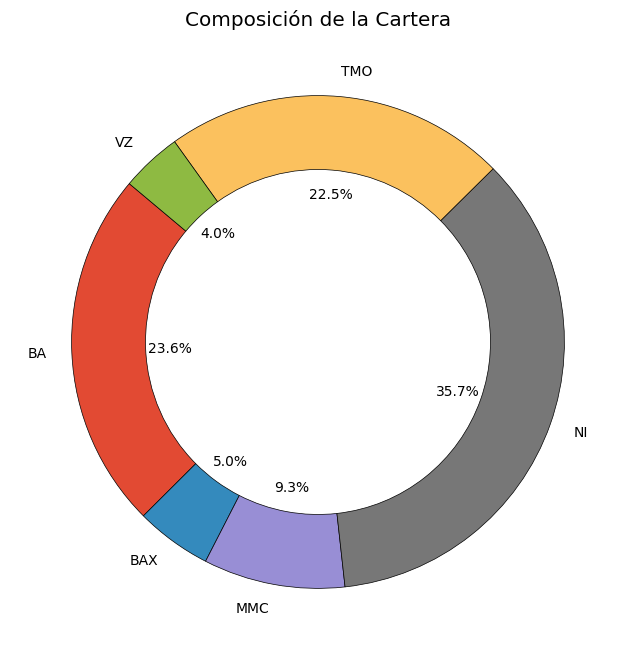

In [45]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_filtrados, labels=activos_filtrados, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera')

# Mostrar el gráfico
plt.show()